##Import dan Load Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

%matplotlib inline

url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


##Feature  Engineering dan Cleaning

In [10]:
df.info()

drop_cols = ['id', 'name', 'first', 'last', 'compas_screening_date',
             'dob', 'age_cat', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
             'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_charge_desc',
             'is_recid', 'r_case_number', 'r_offense_date', 'r_charge_desc',
             'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_desc',
             'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
             'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'in_custody', 'out_custody']

df = df.drop(columns=drop_cols)

df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

##EDA dan Visualisasi

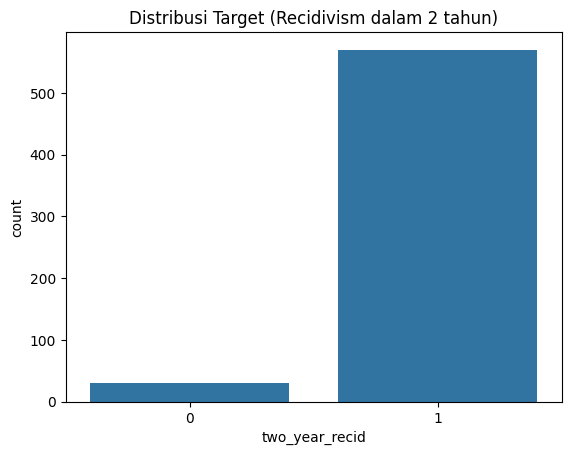

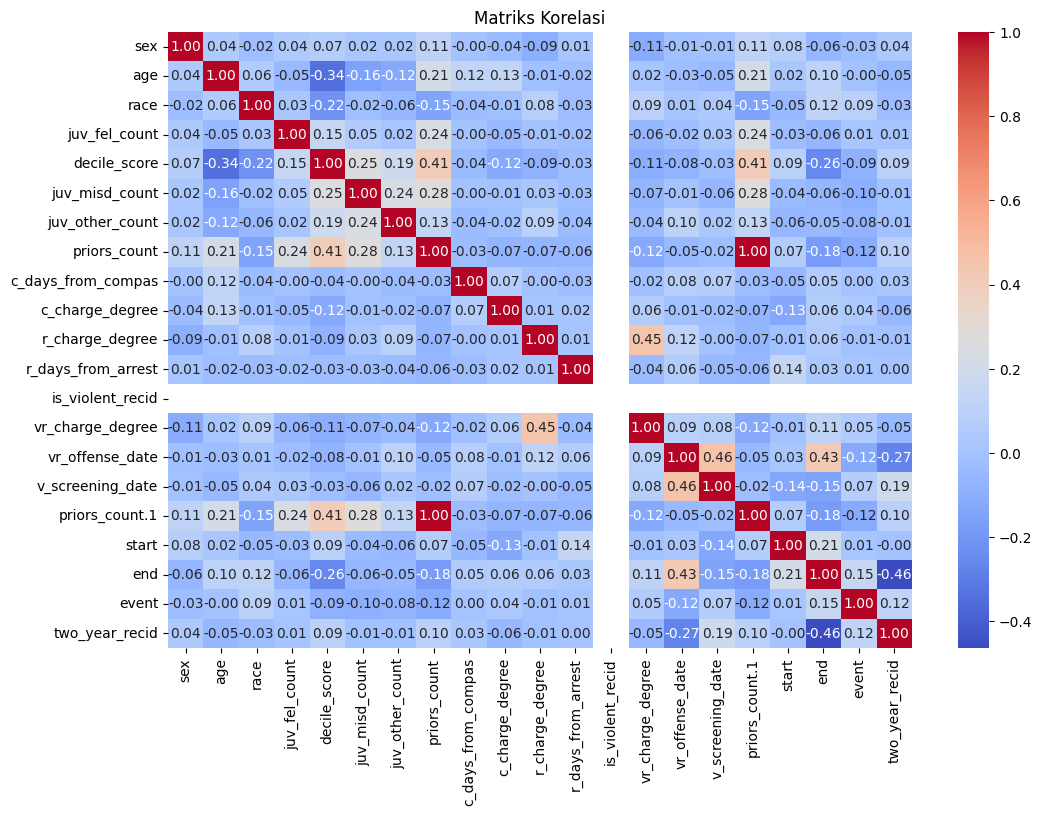

In [11]:
# Distribusi label
sns.countplot(x='two_year_recid', data=df)
plt.title('Distribusi Target (Recidivism dalam 2 tahun)')
plt.show()

# Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()


##Train Model dan Evaluasi

In [12]:
X = df.drop(columns='two_year_recid')
y = df['two_year_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


##Evaluasi Model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Akurasi  : {accuracy:.2f}")
print(f"Presisi  : {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")


Akurasi  : 0.97
Presisi  : 0.97
Recall   : 1.00
F1 Score : 0.98
AUC      : 0.98


##ROC Curve

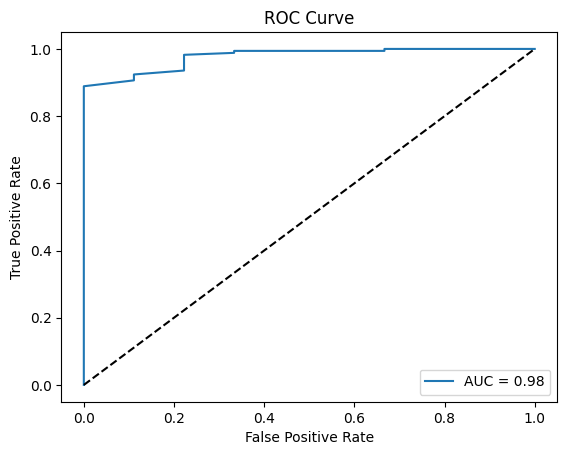

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##Penjelasan Matematika

###1. **Akurasi (Accuracy)**  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$  
   Mengukur seberapa banyak prediksi benar dari total prediksi.

###2. **Presisi (Precision)**  
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$  
   Seberapa akurat model saat memprediksi kelas positif.

###3. **Recall (Sensitivity)**  
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$  
   Seberapa baik model menangkap semua kejadian kelas positif.

###4. **F1 Score**  
   $$
   F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
   $$  
   Harmonic mean dari presisi dan recall.

###5. **AUC (Area Under Curve)**  
   Luas area di bawah kurva ROC, nilai antara 0–1, makin tinggi makin bagus.
